# Phonons At X In Diamond Structure Crystals   
**by <span style="color:darkgreen">Pasquale Pavone</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Jennifer Peschel</span>, <span style="color:darkgreen">Mara Voiculescu</span>, & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, you will learn how to set up and execute a series of calculations for a crystal in the diamond structure, where the atoms are displaced according to a phonon pattern with the periodicity of the **X** point in the Brillouin zone. Additionally, it will be explained how to obtain the phonon frequency of **TA**, **LA**, **LO**, and **TO** modes at **X**, by calculating the derivatives of the energy-vs-displacement curves at zero displacement.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**
    
[0. Before Starting](#0)
    
[1. Set Up the Calculations](#1)  
      
   - [Preparation of the Input File](#1)
   - [Periodicity of Phonons at the X Point](#1) 
   - [Generation of Input Files for the Different Structures](#1.1)
    
[2. Execute the Calculations](#2)   
    
[3. Post-Processing: Extract Energy Derivatives](#3)      
    
[4. Post-Processing: Visualization Tools](#4)
    
[5. Post-Processing: How to Derive the Optical Phonon Frequency at the X point](#5)  
    
   - [Exercises](#5)
    
</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Set Up the Calculations</span>

**<span style="color:#15317E">i) Preparation of the Input File</span>**

The first step is to create a directory for each system that you want to investigate. In this tutorial, we consider as an example the calculation of the energy-vs-displacement curves for carbon in the diamond structure. Thus, we will create a directory **run_diamond_phonon_x**.

In [1]:
%%bash
mkdir -p run_diamond_phonon_x

Inside this directory, we create (or copy from a previous calculation) the file **input.xml** corresponding to a calculation for the equilibrium structure of diamond. This file could look like the following

<span class="DIAMOND_PHONON"></span>
```xml
<input>
 
   <title>Diamond: Phonons at X</title>
 
   <structure speciespath="$EXCITINGROOT/species">
 
      <crystal scale="6.7468">
         <basevect> 0.5  0.5  0.0 </basevect>
         <basevect> 0.5  0.0  0.5 </basevect>
         <basevect> 0.0  0.5  0.5 </basevect>
      </crystal>
 
      <species speciesfile="C.xml" rmt="1.25">
         <atom coord="0.00 0.00 0.00" />
         <atom coord="0.25 0.25 0.25" />
      </species>
 
   </structure>
 
   <groundstate 
      ngridk="2 2 2"
      xctype="GGA_PBE"
      swidth="0.0001"
      rgkmax="4.0"
      gmaxvr="14"
      tforce="true">
   </groundstate>
 
</input>
```

In [2]:
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("02_tutorial_phonons_at_X_in_diamond_structure_crystals", "DIAMOND_PHONON")

# Write out the input as an XML file:
with open('./run_diamond_phonon_x/input.xml', "w") as fid:
    fid.write(input_str)

After creating the input file, set the path for the species file using the command

In [3]:
%%bash
cd run_diamond_phonon_x
python3 -m excitingscripts.setup.excitingroot
cd ..

**<span style="color:#15317E">ii) Periodicity of Phonons at the X Point</span>**

The perturbed crystal, formed by displacing the atoms according to a phonon pattern at the **X** point in the Brillouin zone, has a unit cell which size is doubled with respect to the unperturbed crystal. The new unit cell has four atoms and a tetragonal Bravais lattice with basis vectors

- (1, 0, 0) a / √2;
- (0, 1, 0) a / √2;
- (0, 0, 1) a;

where a is the cubic lattice constant. Furthermore, the positions of the four atoms in the doubled unit cell are (notice that for tetragonal structures all **<span style="color:firebrick">crystal</span>** axes are parallel to **<span style="color:firebrick">Cartesian</span>** directions):

1. (0, 0, 0);
2. (0, 1/2, 1/4);
3. (1/2, 1/2, 1/2);
4. (1/2, 1, 3/4).

According to this, for performing the **<span style="color:firebrick">perturbed</span>** calculations, the input file showed above should be changed to take into account the new structure. This is done by the script **`excitingscripts.setup.diamond_phonon_x`** described in the next subsection. The script will generate input files with the new geometry. For instance, for vanishing displacement, the <code><span style="color:green">crystal</span></code> and <code><span style="color:green">species</span></code> elements of the new input look like this:

```xml
...
      <crystal scale="    4.7707080313">
         <basevect>    1.0000000000    0.0000000000    0.0000000000 </basevect>
         <basevect>    0.0000000000    1.0000000000    0.0000000000 </basevect>
         <basevect>    0.0000000000    0.0000000000    1.4142135624 </basevect>
      </crystal>
      <species speciesfile="C.xml" rmt="1.25">
         <atom coord="    0.0000000000    0.0000000000    0.0000000000"/>
         <atom coord="    0.0000000000    0.5000000000    0.2500000000"/>
         <atom coord="    0.5000000000    0.5000000000    0.5000000000"/>
         <atom coord="    0.5000000000    1.0000000000    0.7500000000"/>
      </species>
...

```

Furthermore, when setting up a new calculation for a tetragonal system, the values defined by the attribute <code><span style="color:mediumblue">ngridk</span></code> in the element <code><span style="color:green">groundstate</span></code> will be also changed according to the new geometry. The new values are chosen in such a way to keep the same density of **k**-points for both the unperturbed unit cell and the tetragonal supercell.

**<span style="color:firebrick">Note that you do NOT need to modify the file input.xml by adding explicitly the configuration with 4 atoms in the super cell. The script `excitingscripts.setup.diamond_phonon_x` described in the next section will do it for you.</span>**

<a id='1.1'></a>

**<span style="color:#15317E">ii) Generation of Input Files for the Different Structures</span>**

In order to generate input files for a series of different structures you have to run the script **`excitingscripts.setup.diamond_phonon_x`**. Notice that the script **`excitingscripts.setup.diamond_phonon_x`** always generates a working directory containing input files for different atomic displacements. Results of the current calculations will be also stored in the working directory. The directory name can be specified by adding the name in the command line (in this example **x_phonon_ta**).

If the directory name is not given explicitly, the script **`excitingscripts.setup.diamond_phonon_x`** generates a directory called by default **workdir**.

**<span style="color:firebrick">Very important</span>**: The working directory is overwritten each time you execute the script **`excitingscripts.setup.diamond_phonon_x`**. Therefore, choose different names for different calculations.

The following command line arguments are also required:
- The first argument (in our example **<span style="color:firebrick">0.015</span>**) represents the absolute value of the maximum displacement (for each component, in crystal coordinates) for which we want to perform the calculation. 
- The second argument (**<span style="color:firebrick">31</span>**) is the number of structures equally spaced in the displacement of the second atom, which are generated between the maximum negative displacement and the maximum positive one.
- The third (last) argument (**<span style="color:firebrick">TA</span>**) is the code of the phonon mode that one wants to investigate.

In [6]:
%%bash
cd run_diamond_phonon_x
python3 -m excitingscripts.setup.diamond_phonon_x 0.015 31 -w x_phonon_ta -p TA
cd ..

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Execute the Calculations</span>

To execute the series of calculations with input files created by **`excitingscripts.setup.diamond_phonon_x`** you have to run the script **`excitingscripts.execute.diamond_phonon`**. If a name for the working directory has been specified, then you must give it here, too.

In [7]:
%%bash
cd run_diamond_phonon_x
python3 -m excitingscripts.execute.diamond_phonon -w x_phonon_ta
cd ..

Now running exciting for run_dir: displ_0.013
 Finished exciting run. Elapsed time: 8.2 seconds.
Now running exciting for run_dir: displ_0.014
 Finished exciting run. Elapsed time: 5.8 seconds.
Now running exciting for run_dir: displ_0.007
 Finished exciting run. Elapsed time: 6.6 seconds.
Now running exciting for run_dir: displ_0.003
 Finished exciting run. Elapsed time: 5.8 seconds.
Now running exciting for run_dir: displ_0.009
 Finished exciting run. Elapsed time: 5.7 seconds.
Now running exciting for run_dir: displ_1e-06
 Finished exciting run. Elapsed time: 6.3 seconds.
Now running exciting for run_dir: displ_0.004
 Finished exciting run. Elapsed time: 5.9 seconds.
Now running exciting for run_dir: displ_0.006
 Finished exciting run. Elapsed time: 5.8 seconds.
Now running exciting for run_dir: displ_0.015
 Finished exciting run. Elapsed time: 5.4 seconds.
Now running exciting for run_dir: displ_0.012
 Finished exciting run. Elapsed time: 5.7 seconds.
Now running exciting for run_d

After the complete run, inside the directory **x_phonon_ta** the results of the calculations  are contained in the subdirectories **displ_*d*** where **d** corresponds to the displacement value. The data for the energy-vs-displacement curves are contained in the file **phonon_results.json**.

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Post-Processing: Extract Energy Derivatives</span>

In order to analyse the results of the calculations, you first have to move to the working directory. At this point, you can use the python script **`excitingscripts.checkfit.energy_vs_displacement`** for extracting the derivatives of the energy-vs-displacement curves at zero displacement.

The first argument (in our example **<span style="color:firebrick">0.015</span>**) represents the absolute value of the maximum displacement for which we want to perform the analysis. The second argument (**<span style="color:firebrick">2</span>**) is the order of the derivative that we want to obtain. Finally, the third argument (**<span style="color:firebrick">12.01</span>**) is the atomic mass of carbon in units of [amu].

**<span style="color:firebrick">NOTICE</span>** that, in this example, the values which are given above as output on the screen are **<span style="color:firebrick">not</span>** directly the actual second derivative of the energy-vs-displacement curves, but the values of the frequency, i.e., combinations involving the **<span style="color:firebrick">square root of the derivative</span>** (see **[Section 5.](#5)** for the explanation). The most accurate value for the frequency corresponds to the fit with the polynomial of the highest order (**<span style="color:firebrick">6</span>** or **<span style="color:firebrick">7</span>**, in this case).

The script **`excitingscripts.checkfit.energy_vs_displacement`** generates the output file **checkfit_energy_results.json**, which can be used in the post-processing analysis.

In [9]:
%%bash
cd run_diamond_phonon_x/x_phonon_ta
python3 -m excitingscripts.checkfit.energy_vs_displacement 0.015 2 12.01
cd ../..

This is the X-phonon-calculation:

 Fit data

 Maximum value of the displacement: 0.015
 Number of displacement values used: 31
 Fit results for the derivative of order: 2

 Polynomial of order  2  ==>   556.48 [cm-1]
 Polynomial of order  3  ==>   556.48 [cm-1]
 Polynomial of order  4  ==>   529.73 [cm-1]
 Polynomial of order  5  ==>   529.73 [cm-1]
 Polynomial of order  6  ==>   527.93 [cm-1]
 Polynomial of order  7  ==>   527.93 [cm-1]

 Polynomial of order  2  ==>   16.6828 [THz]
 Polynomial of order  3  ==>   16.6828 [THz]
 Polynomial of order  4  ==>   15.8808 [THz]
 Polynomial of order  5  ==>   15.8808 [THz]
 Polynomial of order  6  ==>   15.8268 [THz]
 Polynomial of order  7  ==>   15.8268 [THz]




The output should look should look something like this:

```
This is the X-phonon-calculation:

 Fit data

 Maximum value of the displacement: 0.015
 Number of displacement values used: 31
 Fit results for the derivative of order: 2

 Polynomial of order  2  ==>   556.48 [cm-1]
 Polynomial of order  3  ==>   556.48 [cm-1]
 Polynomial of order  4  ==>   529.73 [cm-1]
 Polynomial of order  5  ==>   529.73 [cm-1]
 Polynomial of order  6  ==>   527.93 [cm-1]
 Polynomial of order  7  ==>   527.93 [cm-1]

 Polynomial of order  2  ==>   16.6828 [THz]
 Polynomial of order  3  ==>   16.6828 [THz]
 Polynomial of order  4  ==>   15.8808 [THz]
 Polynomial of order  5  ==>   15.8808 [THz]
 Polynomial of order  6  ==>   15.8268 [THz]
 Polynomial of order  7  ==>   15.8268 [THz]
``` 

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. Post-Processing: Visualization Tools</span>

All scripts, except **`excitingscripts.plot.atomforce`**, which are used as visualization tools of in the tutorial **Phonons at Γ in diamond-structure crystals**, can be used for this tutorial, too. In the following, you can find some example of plot obtained with these tools.

**<span style="color:#15317E">i) excitingscripts.plot.energy</span>**

In [10]:
%%bash
cd run_diamond_phonon_x/x_phonon_ta
python3 -m excitingscripts.plot.energy
cd ../..

<figure>
<img src=" 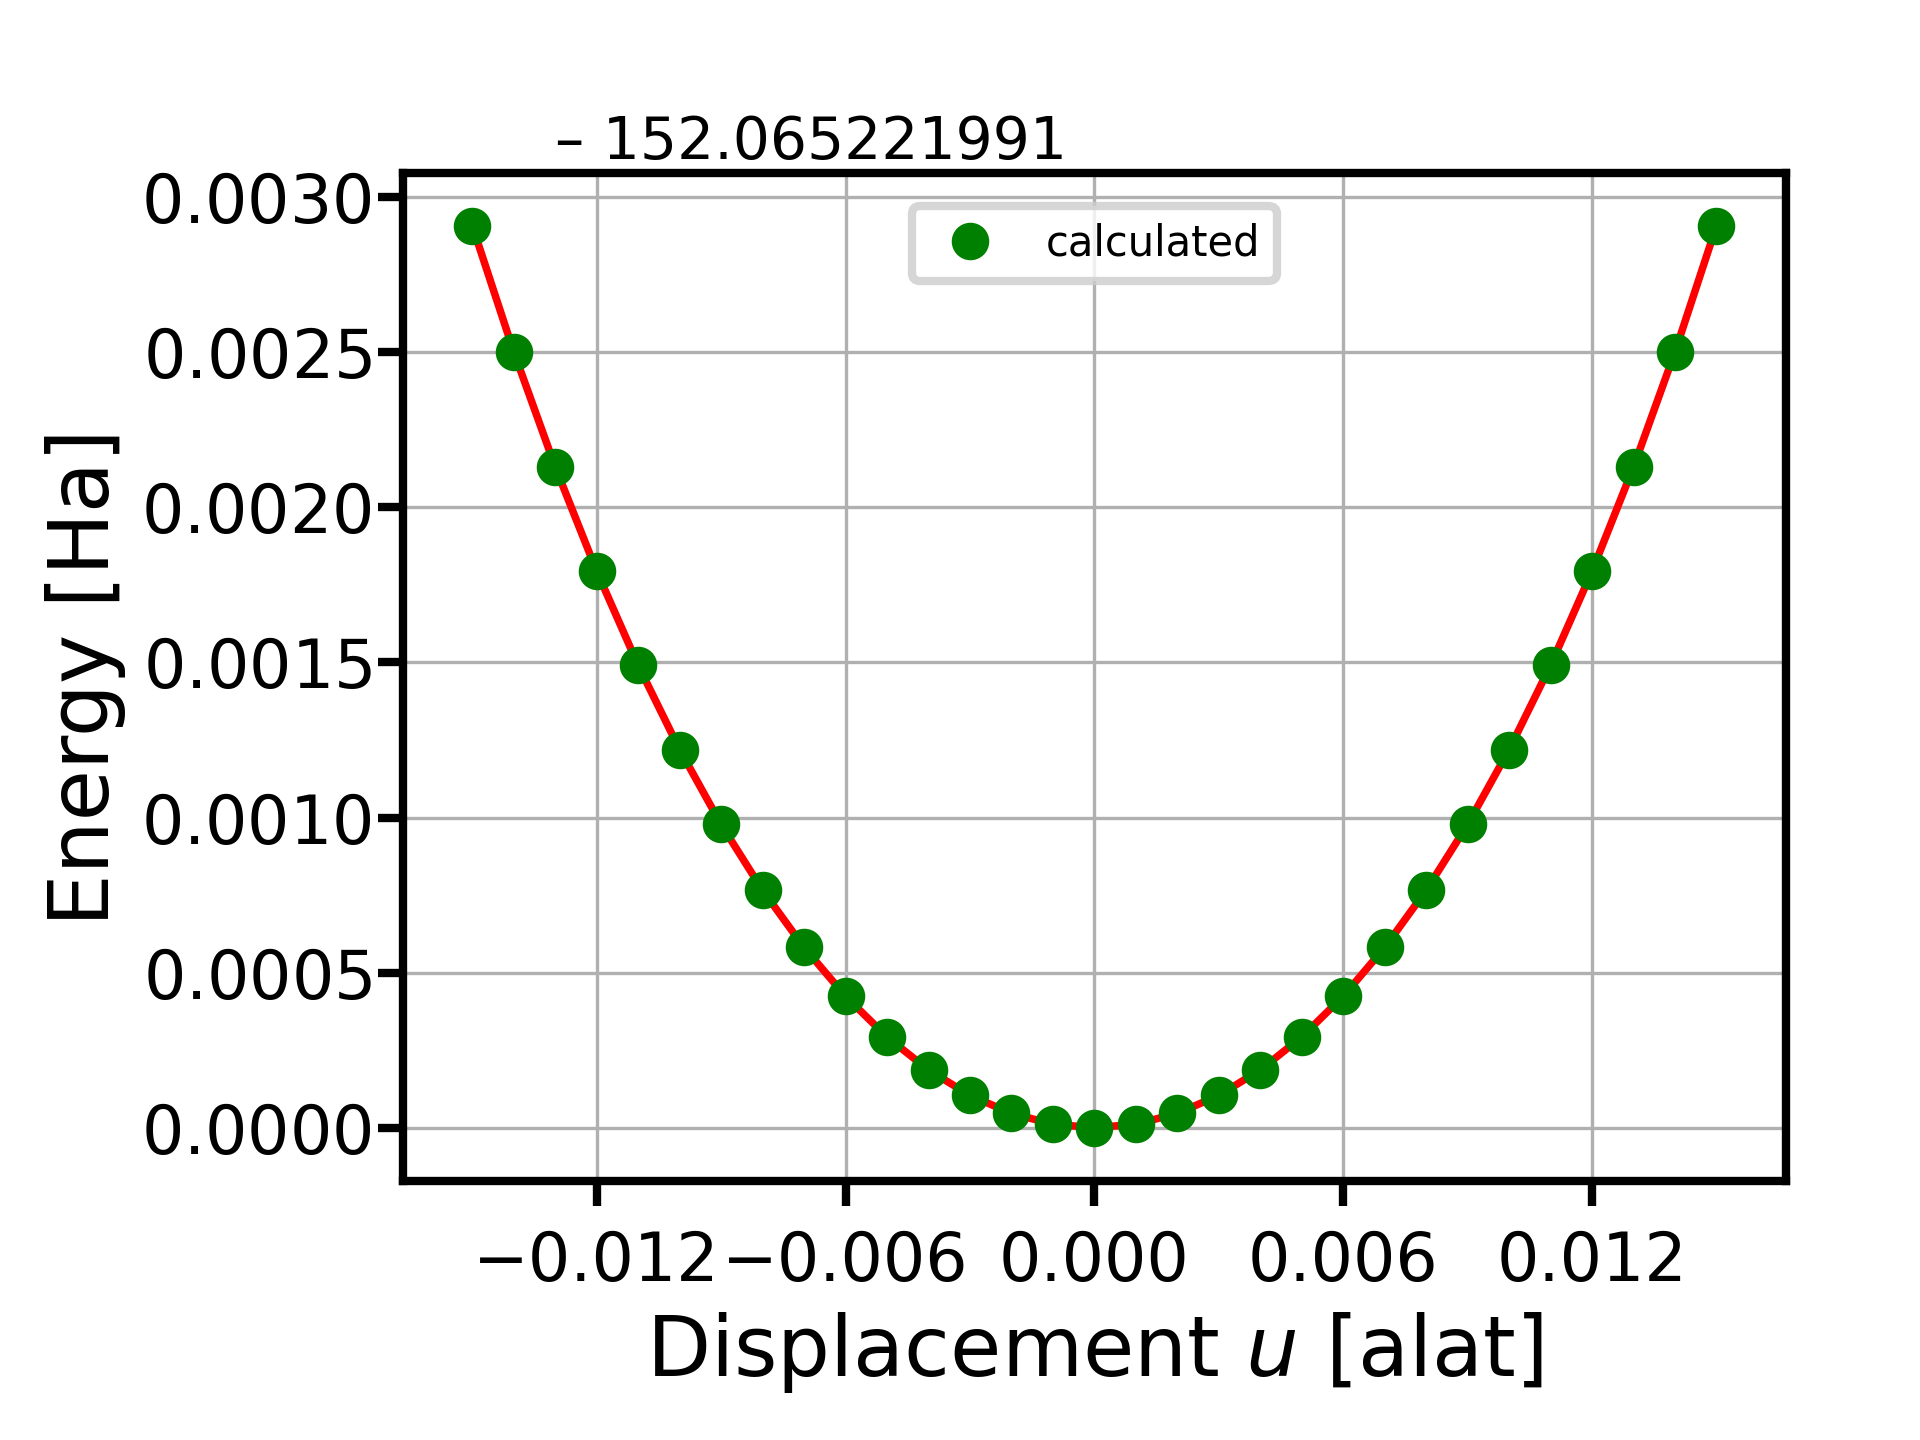" width="600" align="left"/>
</figure>

**<span style="color:#15317E">ii) excitingscripts.plot.checkderiv</span>**

In [11]:
%%bash
cd run_diamond_phonon_x/x_phonon_ta
python3 -m excitingscripts.plot.checkderiv energy
cd ../..

<figure>
<img src=" 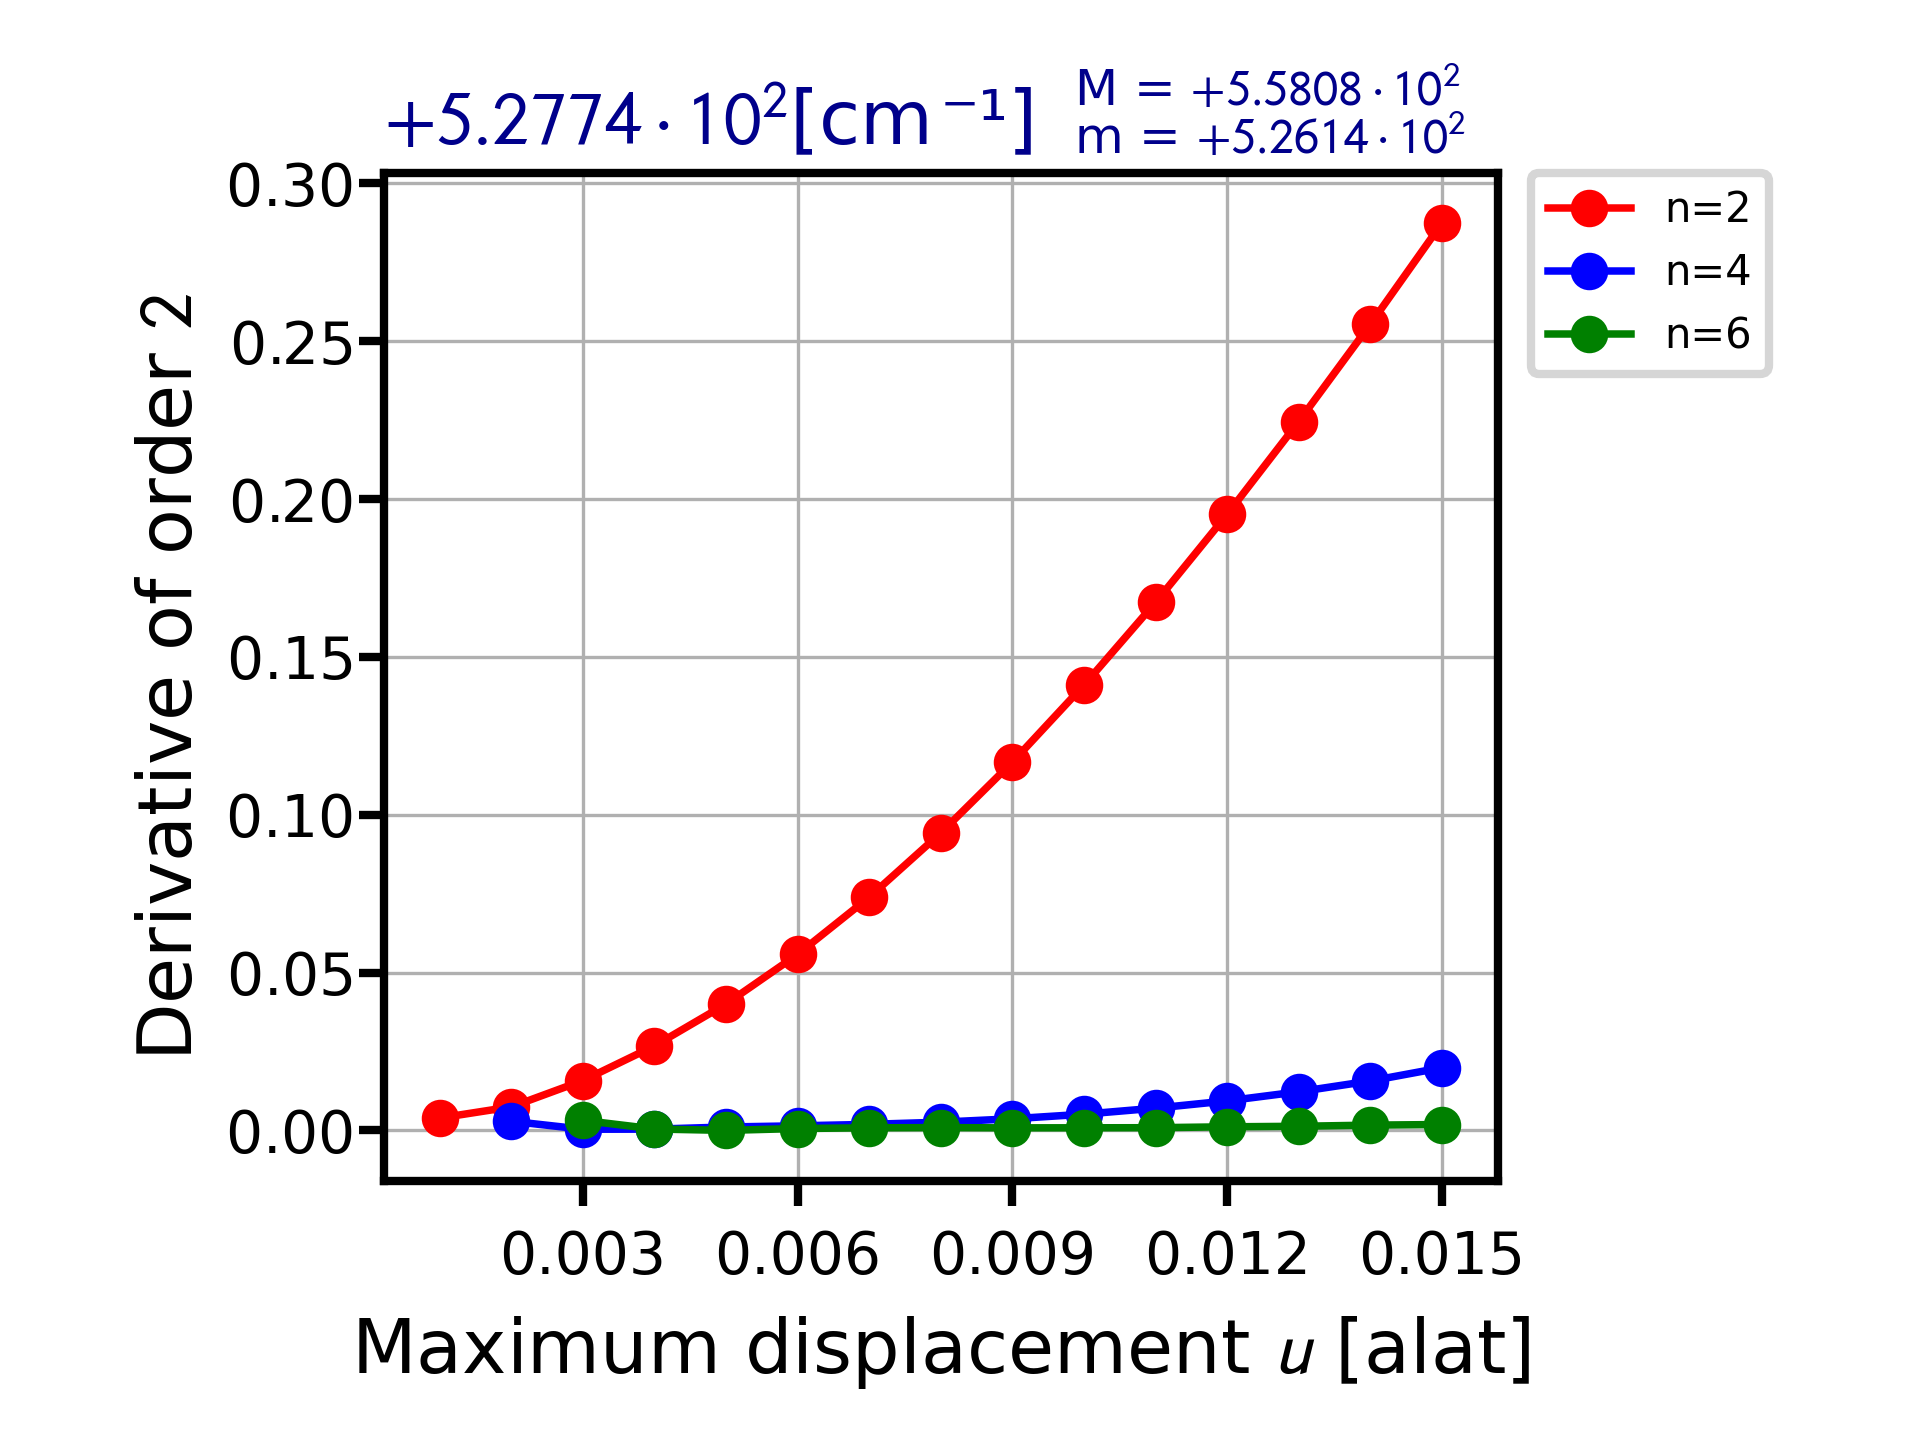" width="600" align="left"/>
</figure>

**<span style="color:#15317E">iii) excitingscripts.plot.status</span>**

In [12]:
%%bash
cd run_diamond_phonon_x/x_phonon_ta
python3 -m excitingscripts.plot.status displ_0.013
cd ../..

<figure>
<img src=" 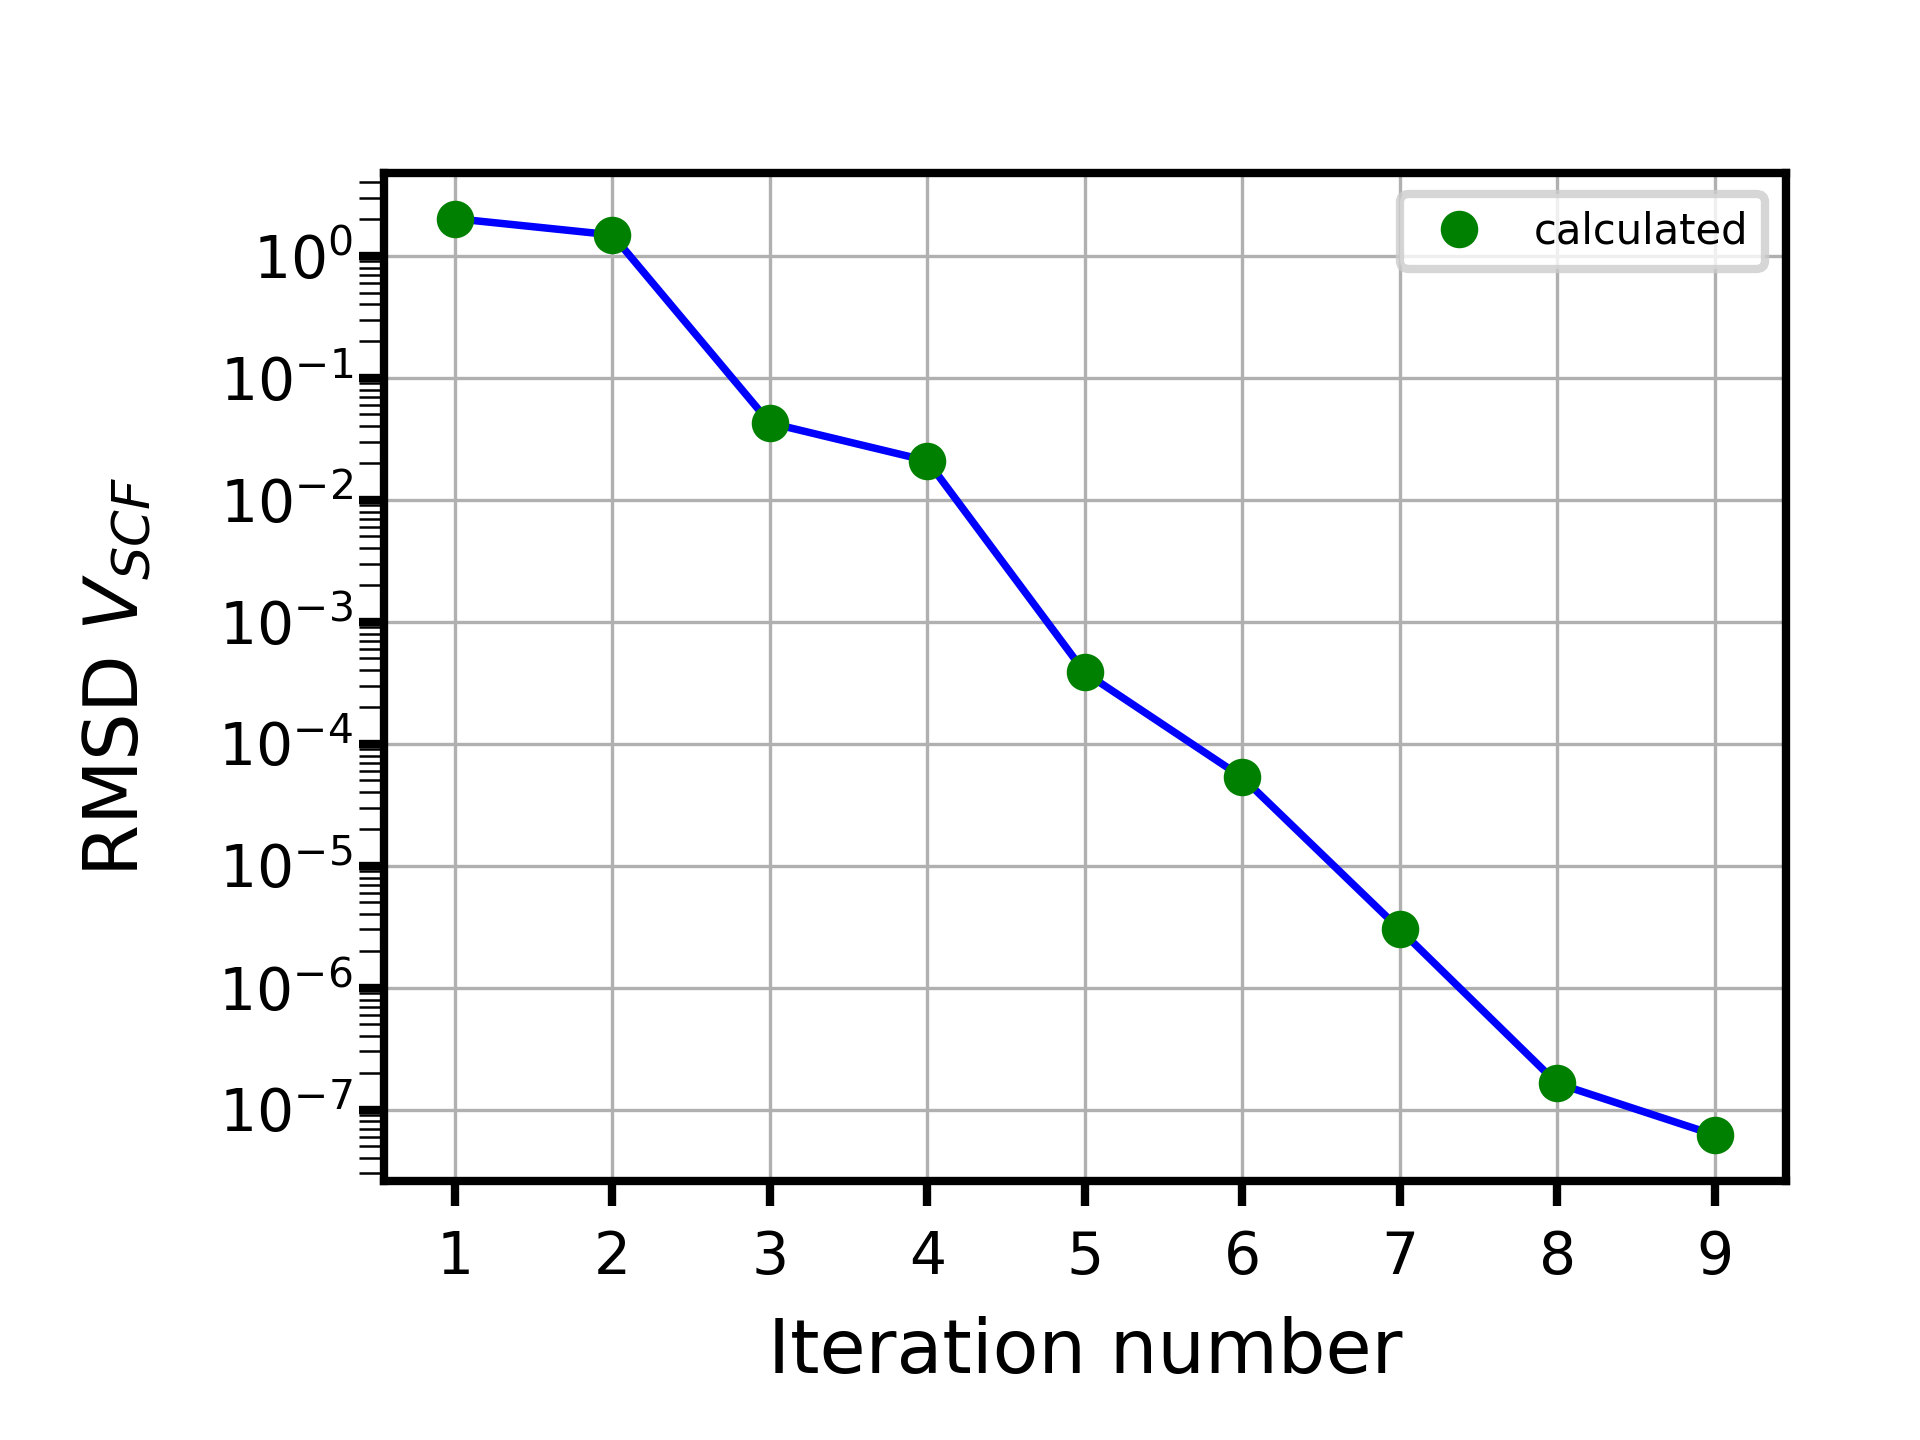" width="600" align="left"/>
</figure>

<a id='5'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">5. Post-Processing: How to Derive the Optical Phonon Frequency at the X Point</span>

The total energy per unit cell of a crystal where the atoms are displaced by their equilibrium positions can be written as a Taylor series

$$ E({\mathbf{u}}) = E_0 + \frac{1}{2} \sum_{\mathbf{R, R'}}\mathbf{u}(\mathbf{R})\: \mathbf{\Phi} (\mathbf{R, R'}) \:\mathbf{u}(\mathbf{R'}) + O(\mathbf{u}^3) $$

where $E_0$ is the energy corresponding to the equilibrium structure, $\mathbf{u}(\mathbf{R})$ is an atomic displacement in the cell $\mathbf{R}$, $\mathbf{\Phi} (\mathbf{R, R'})$ is the inter-atomic force-constants matrix, and $O(\mathbf{u}^3)$ includes all orders higher than two in the displacements $\mathbf{u}$. For small displacements, terms beyond the harmonic approximation (which retains only terms that are quadratic in $\mathbf{u}$) can be neglected. For the diamond structure the displacements of the 4 atoms in the "doubled" unit cell corresponding to the phonon modes at the **X** point can be given as ($a$ is the cubic lattice constant):

**TA phonon**

- $ \mathbf{u}_1 = a \: (0, u, 0)$
- $ \mathbf{u}_2 = a \: (0, u, 0)$
- $ \mathbf{u}_3 = a \: (0, -u, 0)$
- $ \mathbf{u}_4 = a \:(0, -u, 0)$

**LA phonon**
- $ \mathbf{u}_1 = a \:(0, 0, u)$
- $ \mathbf{u}_2 = a\: (0, 0, u)$
- $ \mathbf{u}_3 = a \:(0, 0, -u)$
- $ \mathbf{u}_4 = a\: (0, 0, -u)$

**TO phonon**

- $ \mathbf{u}_1 = a \:(0, u, 0)$
- $ \mathbf{u}_2 = a \:(0, -u, 0)$
- $ \mathbf{u}_3 = a\: (0, -u, 0)$
- $ \mathbf{u}_4 = a\: (0, u, 0)$

**LO phonon**

- $ \mathbf{u}_1 = a\: (0, 0, u)$
- $ \mathbf{u}_2 = a\: (0, 0, -u)$
- $ \mathbf{u}_3 = a \:(0, 0, -u)$
- $ \mathbf{u}_4 = a \:(0, 0, u)$

**Notice**, that in the diamond structure the **LA** and **LO** phonons are degenerate (they have the same frequency).

For a phonon mode at the **X** point, the total energy per unit cell (containing 2 atoms) of the crystal can be written as (see details **[here](https://www.exciting-code.org/uploads/exciting/frozen-phonon-G-X.pdf)**):

$$E({\mathbf{u}}) = E_0 + m \: a^2 \: \omega(\mathbf{X})^2 \: u^2$$

Using appropriate values for m and a and their units, the phonon frequency is given directly from the square root of the second derivative of the energy-vs-displacement curves. This is the output of the fit procedure exposed above if the order of the derivative is taken equal to 2. The optical phonon frequency is obtained from the **<span style="color:mediumblue">plateau value</span>** of the second-order derivative at zero displacement of the energy-vs-displacement curves. For more details on the procedure used for extracting numerical derivatives, see the tutorial **Energy vs. strain calculations**, where the same approach is used for calculating elastic constants.

**<span style="color:green">Exercises</span>**
- The frequency values which are obtained in this example using the quoted parameters, are not realistic. Check the convergence of the optical phonon frequency at the **X** point with respect of the value of the <code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:mediumblue">rgkmax</span></code> attributes using derivatives of the total energy.


- Calculate all modes at the **X** point 

  1. **TA** mode
  2. **TO** mode
  3. **LA** mode
  4. **LO** mode
  
  
- Calculate all frequency modes for different values of the lattice constant. 


- Repeat all the calculations for Silicon.

<hr style="border:2px solid #DDD"> </hr>